# Logistic Regression

Logistic regression is a widely used classification technique. For instance, it can estimate the probability of an email being spam rather than a ham (non-spam), or of a flower of being of a certain species, such as a rose, rather than any other species.

At its core, logistic regression is a binary classifier. It predicts the probability that a given instance belongs to a particular class, usually denoted as 1 (as opposed to the other class, 0). It does this using the logistic function, which outputs a value between 0 and 1, representing this probability.

If the estimated probability exceeds a predefined threshold, typically 50%, the model predicts that the instance belongs to the positive class labeled as "1"; otherwise, it predicts it belongs to the negative class labeled as "0".

Logistic regression model prediction using a 50% threshold probability:

$y_{predicted} = \begin{cases}
        0, & P(y=1) < 0.5 \\
        1, & P(y=1) >= 0.5
      \end{cases}$

## Example: The Iris Dataset

### The Data

Start with loading the dataset from sklearn:

In [4]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)

In this example, the input is a single feature, the petal width. Here we choose just this feature

In [6]:
X = iris.data[["petal width (cm)"]].values

A numpy array is returned, with 150 instances.

In [20]:
type(X)

numpy.ndarray

In [21]:
X.size

150

Here we print the values of some elements, starting with the 1st, with index increments of 30

In [22]:
X[::30]

array([[0.2],
       [0.2],
       [1. ],
       [1.2],
       [2.3]])

Furthermore, the ground truth in this example has only two classes: `virginica` and non-`virginica`

In [23]:
y = iris.target_names[iris.target] == 'virginica'

In [24]:
type(y)

numpy.ndarray

In [25]:
y.size

150

In [26]:
y[::30]

array([False, False, False, False,  True])

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)  # The default test size is 25%

### The Model

Loading the logistic regression model. This model get as input features, and provides back various outputs, such as the predicted class and the associated probability.

In [35]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)

### Fit

In [36]:
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

### Prediction

In [37]:
print(X_test[0])
print(log_reg.predict([X_test[0]]))
print(log_reg.predict_proba([X_test[0]]))
print(y_test[0])

[1.2]
[False]
[[0.84931999 0.15068001]]
False


Above we see that for `X[0]=1.2` (petal width in cm), the model predicts that the flower does not belong to the Virginica class. Moreover, we see that it predicts that with 85% certainty.

The final prediction is based on the comparing the prediction probability of the positive class to the decision threshold, which is 50% by default. If it is above 50%, then the prediction is `True`, and if it is less than 50% the prediction is `False`. 

Logistic regression model prediction using a 50% threshold probability:

$y_{predicted} = \begin{cases}
        0, & P(y=1) < 0.5 \\
        1, & P(y=1) >= 0.5
      \end{cases}$

Let's look at the predictions for all instances in the test dataset, sorted by the petal width:

In [42]:
import pandas as pd
import numpy as np

test_results = np.c_[
    X_test, 
    log_reg.predict_proba(X_test)[:,0], 
    log_reg.predict_proba(X_test)[:,1], 
    log_reg.predict(X_test),
    y_test,
    ]

columns=[
    'petal_width_cm',
    'negative_class_probability',
    'positive_class_probability',
    'y_pred',
    'y_test',
    ]

df = pd.DataFrame(test_results, columns=columns)

# sort the dataframe by petal_width_cm
df = df.sort_values(by=['petal_width_cm'])

df.head(-1)


,petal_width_cm,negative_class_probability,positive_class_probability,y_pred,y_test
11,0.1,0.997399,0.002601,0.0,0.0
13,0.1,0.997399,0.002601,0.0,0.0
37,0.2,0.996188,0.003812,0.0,0.0
34,0.2,0.996188,0.003812,0.0,0.0
33,0.2,0.996188,0.003812,0.0,0.0
30,0.2,0.996188,0.003812,0.0,0.0
29,0.2,0.996188,0.003812,0.0,0.0
20,0.2,0.996188,0.003812,0.0,0.0
12,0.2,0.996188,0.003812,0.0,0.0
1,0.3,0.994415,0.005585,0.0,0.0


According to the table the decision threshold is between 1.6 to 1.8 .
This is the default threshold, for a decision probability of 50%.

## The Math Behind Logistic Regression

Similarly to a linear regression model, _logistic regression calculates a weighted sum of the input features (along with a bias term)_. Then, it transforms it through the logistic function, to provide a probability.

For a single feature:

Linear Regression (predicting a value): $y = w_0 + w_1x_1$

Logistic Regression (predicting probability): $P(y=1) = \frac{1}{1 + e^{-(w_0 + w_1X_1)}}$

Notice that instead of directly outputting the result of a linear transformation like in a linear regression model, logistic regression produces the probability, based on this result and the logistic function.

Note: the mathematical constant $e$ (also known as the Euler number) is approximately equal to $2.71828$. To learn about its significance in mathematics see [Wikipedia](https://en.wikipedia.org/wiki/E_(mathematical_constant)).

Similarly, for $n$ features:

Linear Regression: $Y = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n$

Logistic Regression: $P(y=1) = \frac{1}{1 + e^{-(w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n)}}$

### Logistic Function

The function for the probability is called the **logistic function** ([Wikipedia](https://en.wikipedia.org/wiki/Logistic_function)), hence the name for this classification method.

The exponent (i.e. power) of $e$ in the logistic function is called the **logit** ([Wikipedia](https://en.wikipedia.org/wiki/Logit)).

Let's define the logistic function in code, for a single feature, and plot it for various $w_0$ and $w_1$.

In [45]:
def logistic(x, w0, w1):
    """ generate a logistic function
    Args:
        x: input
        w0: intercept
        w1: slope

    Returns:
        logistic function
    """

    return 1 / (1 + np.exp(w0 -x*w1))

How do the values of $w_0$ and $w_1$ affect the shape of the logistic function?

Let's plot the logistic function with $w_0=0$ and $w_1=1$. This logistic function has a special name - a sigmoid.

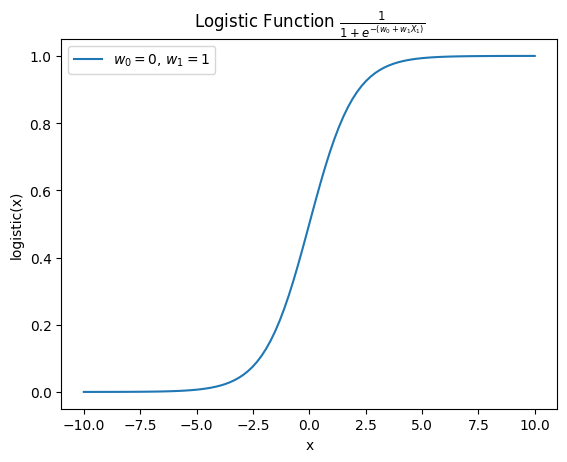

In [47]:
from matplotlib import pyplot as plt

x = np.linspace(-10, 10, 100)
plt.plot(x, logistic(x, 0, 1), label=rf'$w_0={0}$, $w_1={1}$')
plt.xlabel('x')
plt.ylabel('logistic(x)')
plt.legend()
plt.title(r'Logistic Function $\frac{1}{1 + e^{-(w_0 + w_1X_1)}}$')
plt.show()

Next, let's keep $w_1=1$, and vary $w_0$:

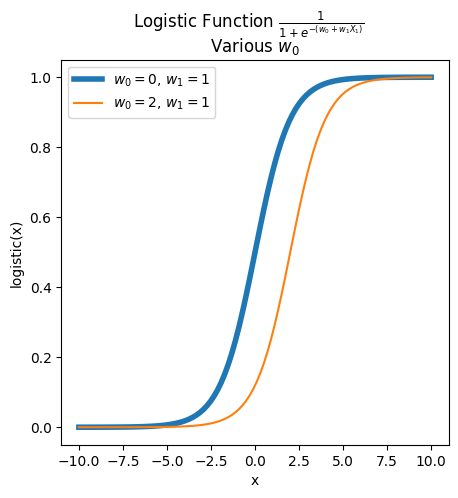

In [51]:
# create a figure with two subplots
fig, ax1 = plt.subplots(1, 1, figsize=(5, 5))
fig.suptitle(r'Logistic Function $\frac{1}{1 + e^{-(w_0 + w_1X_1)}}$')
x = np.linspace(-10, 10, 100)
ax1.plot(x, logistic(x, w0=0, w1=1), label=rf'$w_0=0$, $w_1=1$', linewidth=4)
ax1.plot(x, logistic(x, w0=2, w1=1), label=rf'$w_0=2$, $w_1=1$')
ax1.set_xlabel('x')
ax1.set_ylabel('logistic(x)')
ax1.legend()
ax1.set_title(r'Various $w_0$')

plt.show()

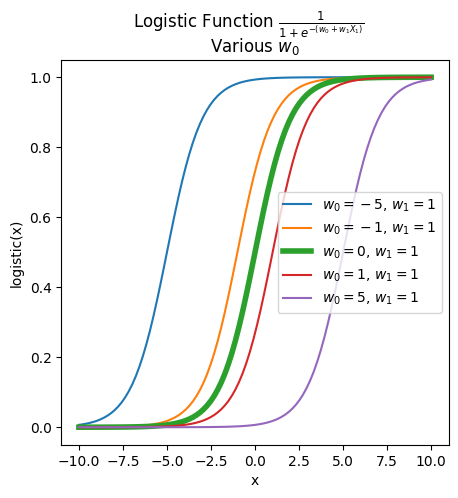

In [ ]:
# create a figure with two subplots
fig, ax1 = plt.subplots(1, 1, figsize=(5, 5))
fig.suptitle(r'Logistic Function $\frac{1}{1 + e^{-(w_0 + w_1X_1)}}$')
x = np.linspace(-10, 10, 100)
ax1.plot(x, logistic(x, w0=-5, w1=1), label=rf'$w_0=-5$, $w_1=1$')
ax1.plot(x, logistic(x, w0=-1, w1=1), label=rf'$w_0=-1$, $w_1=1$')
ax1.plot(x, logistic(x, w0=0, w1=1), label=rf'$w_0=0$, $w_1=1$', linewidth=4)
ax1.plot(x, logistic(x, w0=1, w1=1), label=rf'$w_0=1$, $w_1=1$')
ax1.plot(x, logistic(x, w0=5, w1=1), label=rf'$w_0=5$, $w_1=1$')
ax1.set_xlabel('x')
ax1.set_ylabel('logistic(x)')
ax1.legend()
ax1.set_title(r'Various $w_0$')

plt.show()

We can see that:
* $w_0$ shifts the function horizontally. $w_0$ determines the center of the function (around which it is symmetric. This is also where $logistic(x)=0.5$).

Next, let's plot the logistic function for various sets of $(w_0, w_1)$. First let's keep $w_0=0$ and vary $w_1$ over either positive or negative values. 

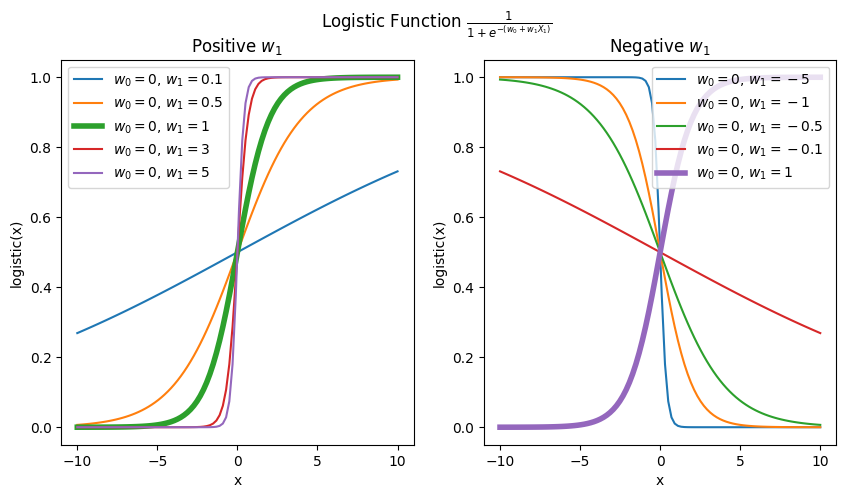

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle(r'Logistic Function $\frac{1}{1 + e^{-(w_0 + w_1X_1)}}$')
x = np.linspace(-10, 10, 100)
ax1.plot(x, logistic(x, w0=0, w1=0.1), label=rf'$w_0=0$, $w_1=0.1$')
ax1.plot(x, logistic(x, w0=0, w1=0.5), label=rf'$w_0=0$, $w_1=0.5$')
ax1.plot(x, logistic(x, w0=0, w1=1), label=rf'$w_0=0$, $w_1=1$', linewidth=4)
ax1.plot(x, logistic(x, w0=0, w1=3), label=rf'$w_0=0$, $w_1=3$')
ax1.plot(x, logistic(x, w0=0, w1=5), label=rf'$w_0=0$, $w_1=5$')
ax1.set_xlabel('x')
ax1.set_ylabel('logistic(x)')
ax1.legend()
ax1.set_title(r'Positive $w_1$')

ax2.plot(x, logistic(x, w0=0, w1=-5), label=rf'$w_0=0$, $w_1=-5$')
ax2.plot(x, logistic(x, w0=0, w1=-1), label=rf'$w_0=0$, $w_1=-1$')
ax2.plot(x, logistic(x, w0=0, w1=-0.5), label=rf'$w_0=0$, $w_1=-0.5$')
ax2.plot(x, logistic(x, w0=0, w1=-0.1), label=rf'$w_0=0$, $w_1=-0.1$')
ax2.plot(x, logistic(x, w0=0, w1=1), label=rf'$w_0=0$, $w_1=1$', linewidth=4)
ax2.set_xlabel('x')
ax2.set_ylabel('logistic(x)')
ax2.legend()
ax2.set_title(r'Negative $w_1$')

plt.show()

We can notice the following:

* The magnitude of $w_1$ determines the steepness of the logistic function. A larger absolute value of $w_1$ corresponds to a steeper curve.
* The sign of $w_1$ determines the orientation of the logistic function. The sign of $w_1$ flips the function over a vertical axis.

## The Log-Loss Function (aka Cross-Entropy Loss)
The loss function for logistic regression, is called the _Log-Loss_, or the _Cross-Entropy_ Loss ([Wikipedia](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression)). It is defined as (for a single data instance):

$loss(\bold{w}) = \begin{cases}
        -log(P(y=1)), & y=1 \\
        -log(1-P(y=1)), & y=0
      \end{cases}$

That is, if the ground truth is $y=1$, the loss is the negative logarithm of the probability of the positive class. If the ground truth is $y=0$, the loss is the negative logarithm of the probability of the negative class.

**Let's see why this loss function makes sense intuitively. But first, let's recall what is a logarithmic function.**

##### Recall: The Logarithm
The logarithm of a number $x$ to the base $b$ is the exponent to which $b$ must be raised to produce $x$. 

For example, the logarithm in base $10$ of $1000$ is $3$, since $1000 = 10^3$. This can be written as $\log_{10}(1000) = 3$. 

The logarithm of $x$ to base $b$ is denoted as $\log_b(x)$, or without the explicit base, $\log(x)$, when no confusion is possible, or when the base does not matter [Wikipedia](https://en.wikipedia.org/wiki/Logarithm). 

In other words, the logarithm is the inverse function to exponentiation.

### Plotting the Logarithm Function

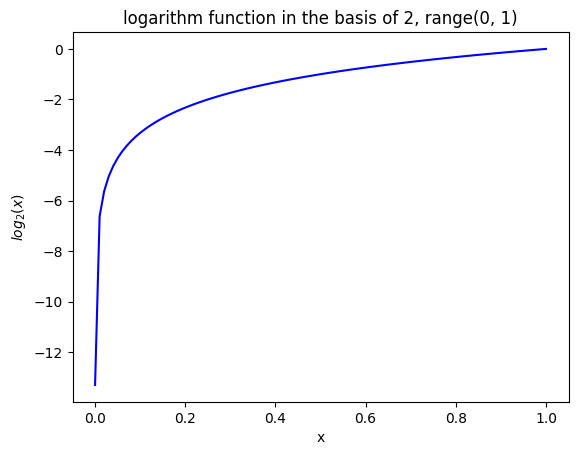

In [53]:
# plot logarithm function in the basis of 2
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0.0001, 1, 100)
y = np.log2(x)
plt.plot(x, y, c='b')
plt.xlabel('x')
plt.ylabel(r'$log_2(x)$')
plt.title('logarithm function in the basis of 2, range(0, 1)')
plt.show()

### Edge Case Analysis of the Log-Loss Function

With that, let's get back to the log-loss function, and check it values for edge cases:

$loss(\bold{w}) = \begin{cases}
        -log(P(y=1)), & y=1 \\
        -log(1-P(y=1)), & y=0
      \end{cases}$

The edge cases are where the probability is either $0$ or $1$. 

We would like the loss to be minimal for a perfect correct prediction, and infinitely large for a completely incorrect prediction. Let's see that this is indeed the case for the log-loss function.

Prediction| Ground Truth | P(y=1) | loss value |
|---|---|--------|------------|
|True Negative| $0$ | $0$ | $-\log(1) = 0$ |
|True Positive| $1$ |$1$ |$-\log(1) = 0$ |
|False Positive| $0$ | $1$ | $\log(0) = +\infty$ |
|False Negative| $1$ | $0$ |$\log(0) = +\infty$ |

### Mathematical Form

The log-loss function:

$loss(\bold{w}) = \begin{cases}
        -log(P(y=1)), & y=1 \\
        -log(1-P(y=1)), & y=0
      \end{cases}$

Can be written as:

$LogLoss(\bold{w}) = -y\cdot \log(P) -(1-y)\cdot \log(1-P)$

**To see why: plug in $y=0$ or $y=1$**


For $m$ data instances:

$LogLoss(\bold{w}) = \frac{1}{m} \Sigma_{i=1}^m \left[-y\cdot \log(P) -(1-y)\cdot \log(1-P)\right]$

#### Notes
1. The $\log$ can be in any base, as long as it is used consistently. The common base is $2$, but sometimes (e.g. in Tensorflow the base is $e$). One isn't better than the other. It's kind of like the difference between using km/hour and m/s (for context: [stackexchange](https://stats.stackexchange.com/questions/295174/difference-in-log-base-for-cross-entropy-calcuation)). 
2. Minimizing this loss will result in the model with the maximum likelihood of being optimal, assuming that the instances follow a Gaussian distribution around the mean of their class.

## Training Algorithm

* There is no 'closed form' solution for logistic regression, such as the normal equation for linear regression.
* An iterative methods, such as gradient descent are used.

### Comparison between logistic and linear regression

|              | Linear Regression                                | Logistic Regression                                                     |
|--------------|-------------------------------------------------|-------------------------------------------------------------------------|
| Model Equation   | $Y = w_0 + w_1X_1 + w_2X_2 + ... + w_nX_n$                      | $P(Y=1) = \frac{1}{1 + e^{-(w_0 + w_1X_1 + w_2X_2 + ... + w_nX_n)}}$ |
| Output Range  | Continuous values                               | Probabilities (0 to 1)                                                  |
| Loss Function | Mean Squared Error (MSE)<br> $MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$ | Binary Cross-Entropy Loss (Log Loss)<br> $Log Loss = -\frac{1}{n} \sum_{i=1}^{n} [y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)]$                                  |
| Assumptions   | Linear relationship between independent variables and target | Log-odds are linearly related to independent variables                   |
| Interpretation | Coefficients represent change in the target for a unit change | Coefficients represent change in the log-odds of the target              |
| Application    | Regression tasks predicting continuous values    | Binary classification tasks                                             |
| Optimization Objective | Minimize the sum of squared differences between predictions | Minimize the log loss between predicted and actual labels                 |

$y$ represents the true target values, $\hat{y}$ represents the predicted target values, and $n$ represents the number of data points.               |